# Character Model Analysis

In [52]:
import json
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.colors as mcolors
%matplotlib inline

def plot_files(files):
    offsets = [1] * len(files)

    labels_and_results = []
    color_map = list(mcolors.TABLEAU_COLORS.keys())

    for (label, file) in files:
        with open(file, 'r') as f:
            result = json.load(f)
            labels_and_results.append((label, result))


    fig, axs = plt.subplots(ncols=2, figsize=(10, 4))

    for i in range(len(files)):
        label = labels_and_results[i][0]
        result = labels_and_results[i][1]

        num_data_points = len(result['elapsed_times'])
        epoch_start = offsets[i]
        epoch_range = list(range(epoch_start, epoch_start + num_data_points))

        axs[0].plot(epoch_range, result['dev_losses'], color_map[i], linestyle='--', label=label + '_dev')
        axs[0].plot(epoch_range, result['train_losses'], color_map[i], label=label + '_train')

        axs[1].plot(epoch_range, result['dev_accu_pcts'], color_map[i], linestyle='--')
        axs[1].plot(epoch_range, result['train_accu_pcts'], color_map[i])

    axs[0].set_title('Epoch vs Loss')
    axs[1].set_title('Epoch vs Accuracy')
    axs[0].xaxis.set_major_locator(mticker.MultipleLocator(5))
    #axs[0].set_ylim(ymin = 0.0, ymax=4.0)
    axs[1].xaxis.set_major_locator(mticker.MultipleLocator(5))
    #axs[1].set_ylim(ymin = 0.0, ymax=1.0)
    fig.legend(bbox_to_anchor=(1.0, 1), loc="upper left")

Let's just try a few networks
```
python trainer/task.py --batch-size 64 --num-epochs 25 --device cpu --learning-rate 0.001 --weight-decay 0.01 --embedding-dimensions 100 --hidden-layer-size 64 --hidden-depth=1 --output-folder char-rnn-64-1
python trainer/task.py --batch-size 64 --num-epochs 25 --device cpu --learning-rate 0.001 --weight-decay 0.01 --embedding-dimensions 100 --hidden-layer-size 128 --hidden-depth=1 --output-folder char-rnn-128-1
python trainer/task.py --batch-size 64 --num-epochs 25 --device cpu --learning-rate 0.001 --weight-decay 0.01 --embedding-dimensions 100 --hidden-layer-size 256 --hidden-depth=1 --output-folder char-rnn-256-1
python trainer/task.py --batch-size 64 --num-epochs 25 --device cpu --learning-rate 0.001 --weight-decay 0.01 --embedding-dimensions 100 --hidden-layer-size 512 --hidden-depth=1 --output-folder char-rnn-512-1
python trainer/task.py --batch-size 64 --num-epochs 25 --device cpu --learning-rate 0.001 --weight-decay 0.01 --embedding-dimensions 100 --hidden-layer-size 1024 --hidden-depth=1 --output-folder char-rnn-1024-1
python trainer/task.py --batch-size 64 --num-epochs 25 --device cpu --learning-rate 0.001 --weight-decay 0.01 --embedding-dimensions 100 --hidden-layer-size 2048 --hidden-depth=1 --output-folder char-rnn-2048-1
```
```
python trainer/task.py --batch-size 512 --num-epochs 25 --device mps --learning-rate 0.001 --weight-decay 0.01 --embedding-dimensions 100 --hidden-layer-size 4096 --hidden-depth=1 --output-folder char-rnn-4096-1
```

```
python task.py --batch-size 64 --num-epochs 50 --device mps --learning-rate 0.002 --weight-decay 0.01 --embedding-dimensions 100 --hidden-layer-size 1024 --hidden-depth=1 --output-folder lstm-1024
```

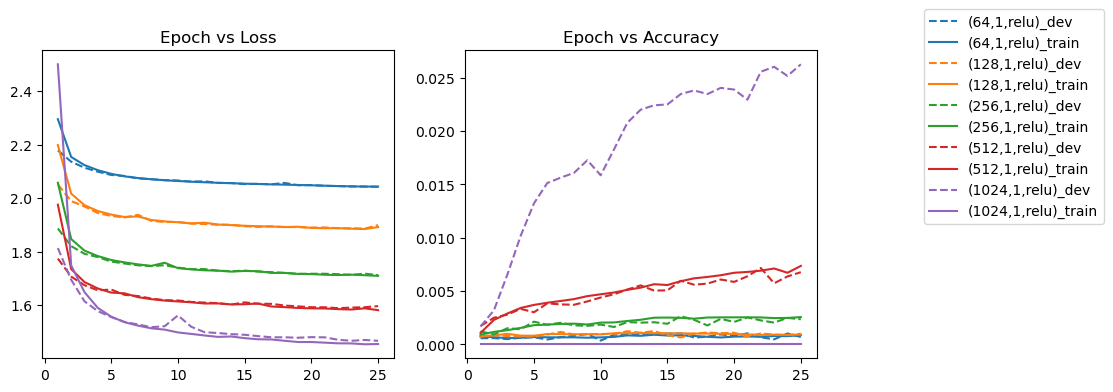

In [84]:
files = [
    ('(64,1,relu)', 'training_results/char-rnn-64-1/training-results.json'), # duplicates, 10 length max
    ('(128,1,relu)', 'training_results/char-rnn-128-1/training-results.json'), # duplicates, 10 length max
    ('(256,1,relu)', 'training_results/char-rnn-256-1/training-results.json'), # duplicates, 10 length max
    ('(512,1,relu)', 'training_results/char-rnn-512-1/training-results.json'), # duplicates, 10 length max
    ('(1024,1,relu)', 'training_results/char-rnn-1024-1/training-results.json'), # duplicates, 10 length max
]
plot_files(files)

These are promising - as the model size increases the loss seems to decrease pretty consistently. Let's try out `tanh` instead of `relu`:
    

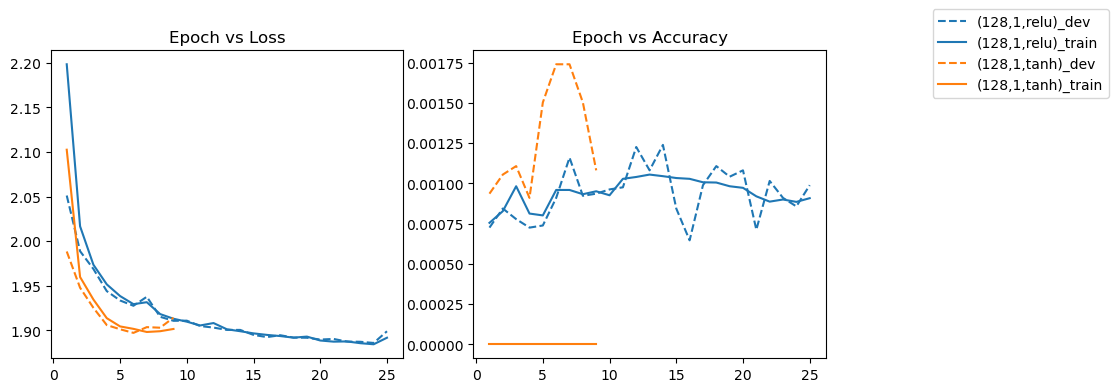

In [85]:
files = [
    ('(128,1,relu)', 'training_results/char-rnn-128-1/training-results.json'), # duplicates, 10 length max
    ('(128,1,tanh)', 'training_results/char-rnn-128-1-tanh/training-results.json'), # duplicates, 10 length max (0.002 LR)
]
plot_files(files)

Seems like tanh may be performing slightly better. Let's see the impact of adding layers:

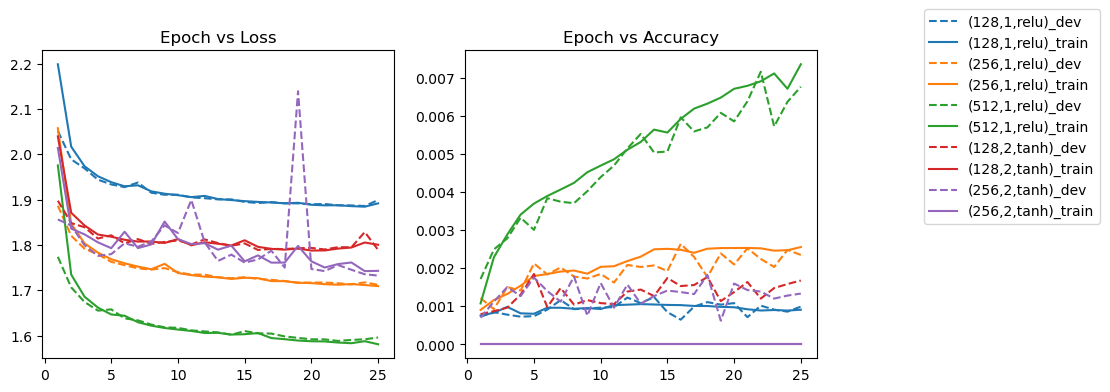

In [87]:
files = [
    ('(128,1,relu)', 'training_results/char-rnn-128-1/training-results.json'), # duplicates, 10 length max
    ('(256,1,relu)', 'training_results/char-rnn-256-1/training-results.json'), # duplicates, 10 length max
    ('(512,1,relu)', 'training_results/char-rnn-512-1/training-results.json'), # duplicates, 10 length max
    ('(128,2,tanh)', 'training_results/char-rnn-128-2-tanh/training-results.json'), # duplicates, 10 length max (0.002 LR)
    ('(256,2,tanh)', 'training_results/char-rnn-256-2-tanh/training-results.json'), # duplicates, 10 length max (0.002 LR)
]
plot_files(files)

Seems like adding a layer is less effective than increasing the network width. Let's try with an LSTM.

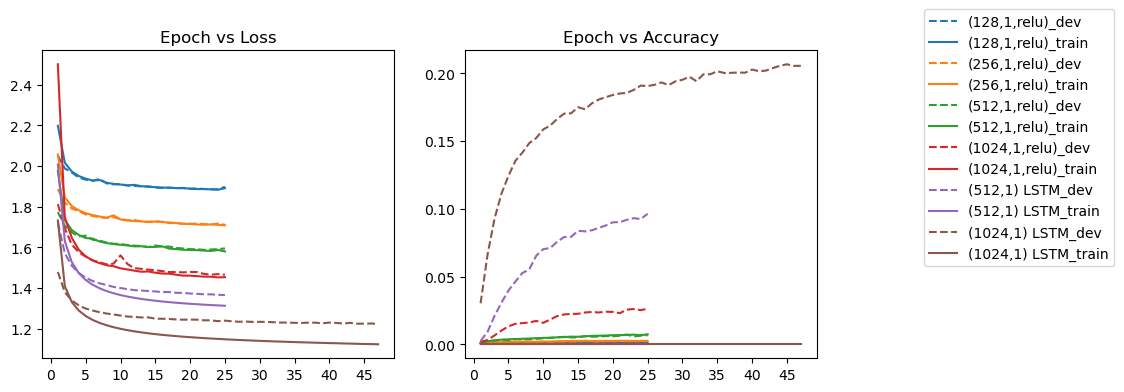

In [95]:
files = [
    ('(128,1,relu)', 'training_results/char-rnn-128-1/training-results.json'), # duplicates, 10 length max
    ('(256,1,relu)', 'training_results/char-rnn-256-1/training-results.json'), # duplicates, 10 length max
    ('(512,1,relu)', 'training_results/char-rnn-512-1/training-results.json'), # duplicates, 10 length max
    ('(1024,1,relu)', 'training_results/char-rnn-1024-1/training-results.json'), # duplicates, 10 length max
    ('(512,1) LSTM', 'training_results/lstm/training-results.json'), # duplicates, 10 length max
    ('(1024,1) LSTM', 'training_results/lstm-1024/training-results.json'), # duplicates, 10 length max
]
plot_files(files)

The LSTM performs significantly better, let's try some bigeer networks:

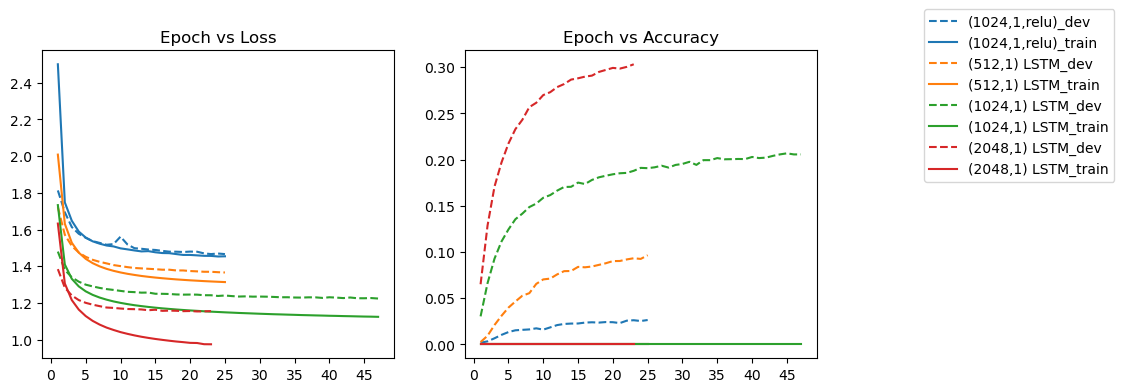

In [96]:
files = [
    ('(1024,1,relu)', 'training_results/char-rnn-1024-1/training-results.json'), # duplicates, 10 length max
    ('(512,1) LSTM', 'training_results/lstm/training-results.json'), # duplicates, 10 length max
    ('(1024,1) LSTM', 'training_results/lstm-1024/training-results.json'), # duplicates, 10 length max
    ('(2048,1) LSTM', 'training_results/lstm-2048/training-results.json'), # duplicates, 10 length max
]
plot_files(files)

These networks perform quite well even when scaling up. Let's look into the performance of only optimizing for the answer instead of also including the clue tokens as part of the loss function.

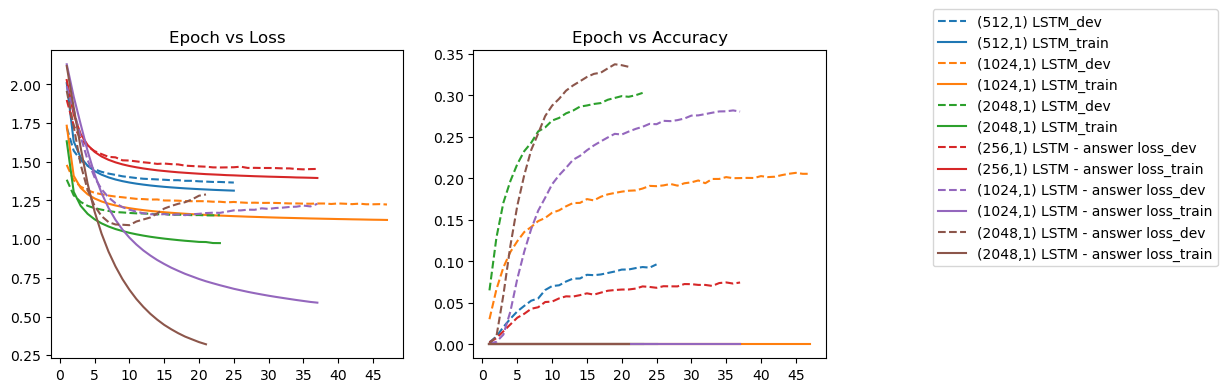

In [73]:
files = [
    ('(512,1) LSTM', 'training_results/lstm/training-results.json'), # duplicates, 10 length max
    ('(1024,1) LSTM', 'training_results/lstm-1024/training-results.json'), # duplicates, 10 length max
    ('(2048,1) LSTM', 'training_results/lstm-2048/training-results.json'), # duplicates, 10 length max

    ('(256,1) LSTM - answer loss', 'training_results/char-lstm-256-1-answer-loss/training-results.json'), # duplicates, 10 length max
    ('(1024,1) LSTM - answer loss', 'training_results/lstm-1024-answer-loss/training-results.json'), # duplicates, 10 length max
    ('(2048,1) LSTM - answer loss', 'training_results/lstm-2048-answer-loss/training-results.json'), # duplicates, 10 length max
]
plot_files(files)

Seems like only including the answer is useful. Let's compare our best networks with the best MLP we had:

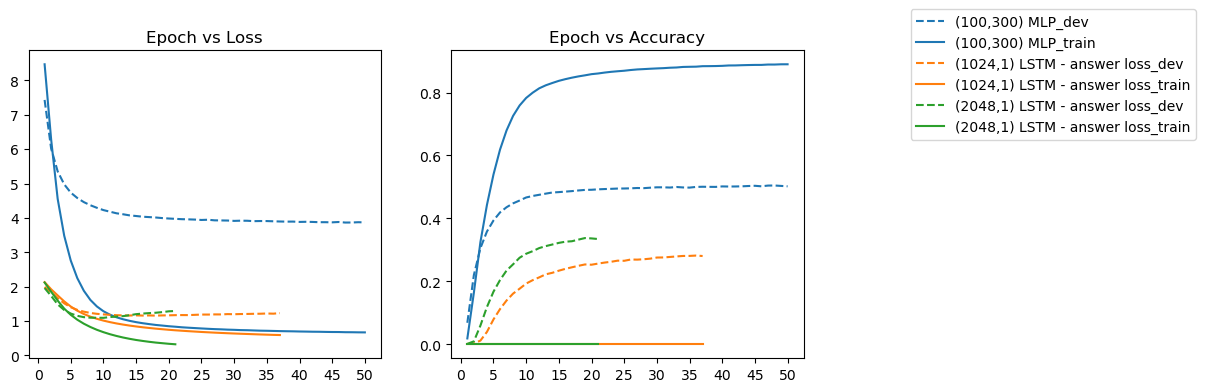

In [116]:
files = [
    ('(100,300) MLP', 'training_results/final-test/training-results.json'), # duplicates, 10 length max
    ('(1024,1) LSTM - answer loss', 'training_results/lstm-1024-answer-loss/training-results.json'), # duplicates, 10 length max
    ('(2048,1) LSTM - answer loss', 'training_results/lstm-2048-answer-loss/training-results.json'), # duplicates, 10 length max
]
plot_files(files)

Still have quite a ways to go, but this architecture seems promising and more flexible.

# Performance Optimization

```
python task.py --batch-size 64 --num-epochs 50 --device cpu --learning-rate 0.002 --weight-decay 0.01 --embedding-dimensions 1 --hidden-layer-size 128 --hidden-depth=1 --output-folder can-delete

```
See : https://pytorch.org/docs/stable/notes/faq.html#pack-rnn-unpack-with-data-parallelism
```

This seems significantly slower.

## Embedding

Let's add an embedding layer
```
python task.py --batch-size 256 --num-epochs 50 --device mps --learning-rate 0.002 --weight-decay 0.01 --embedding-dimensions 16 --hidden-layer-size 2048 --hidden-depth=1 --output-folder lstm-2048-16-embed
````

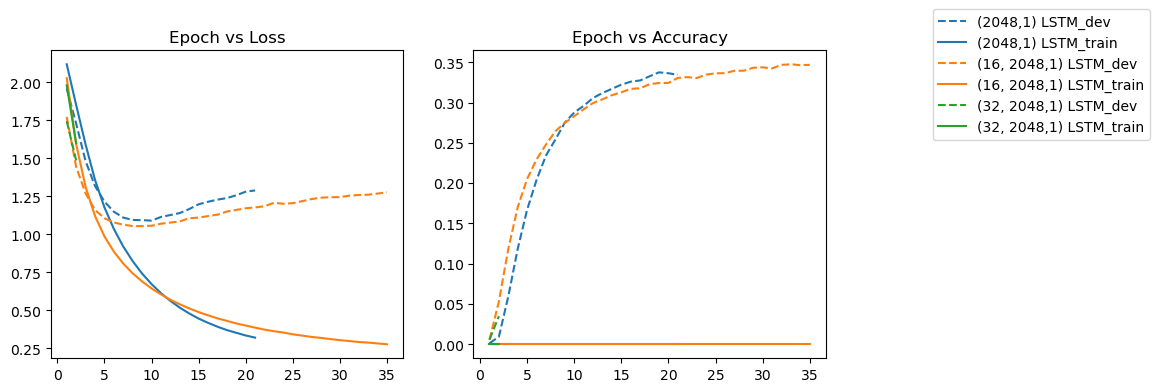

In [80]:
files = [
    ('(2048,1) LSTM', 'training_results/lstm-2048-answer-loss/training-results.json'), # duplicates, 10 length max
    ('(16, 2048,1) LSTM', 'training_results/lstm-2048-16-embed/training-results.json'), # duplicates, 10 length max
    ('(32, 2048,1) LSTM', 'training_results/lstm-2048-32-embed/training-results.json'), # duplicates, 10 length max
]
plot_files(files)

This seems slightly better, but not by a ton. Finally, let's try adding a dropout layer in:

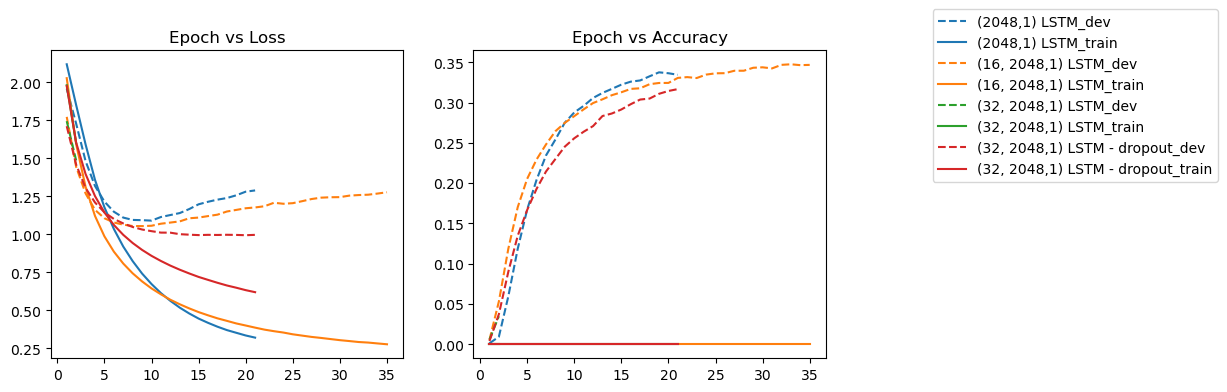

In [82]:
files = [
    ('(2048,1) LSTM', 'training_results/lstm-2048-answer-loss/training-results.json'), # duplicates, 10 length max
    ('(16, 2048,1) LSTM', 'training_results/lstm-2048-16-embed/training-results.json'), # duplicates, 10 length max
    ('(32, 2048,1) LSTM', 'training_results/lstm-2048-32-embed/training-results.json'), # duplicates, 10 length max
    ('(32, 2048,1) LSTM - dropout', 'training_results/lstm-2048-dropout-02/training-results.json'), # duplicates, 10 length max
]
plot_files(files)

## Sampling
Let's try sampling from our model:

In [1]:
import torch
from argparse import Namespace
import trainer.crossword.trainer

args = Namespace(hidden_layer_size=512, embedding_dimensions=100, hidden_depth=1)
train_dataset, test_dataset, dev_dataset, dataset = trainer.crossword.trainer.load_dataset()
model, collate_batch, vocab = trainer.crossword.trainer.build_character_model(dataset=dataset, device='cpu', args=args)

model_path = 'training_results/lstm-2048-16-embed/model-full-epoch-35.pt'
model = torch.load(model_path)
model = model.to('cpu')


len(dataset)=758874
len(train_dataset)=607099
len(test_dataset)=75888
len(dev_dataset)=75887
max_answer_length=22
len(vocab)=91
vocab.get_itos()=['<PAD>', '<BOC>', '<EOC>', '<EOA>', '<1>', '<2>', '<3>', '<4>', '<5>', '<6>', '<7>', '<8>', '<9>', '<10>', '<11>', '<12>', '<13>', '<14>', '<15>', '<16>', '<17>', '<18>', '<19>', '<20>', '<21>', '<22>', 'e', ' ', 'a', 'o', 't', 's', 'r', 'i', 'n', 'l', 'd', 'c', 'h', 'm', 'p', 'u', 'g', 'f', 'b', 'y', 'w', 'k', '_', '"', 'v', '.', ',', "'", '-', 'x', 'j', 'z', '?', '1', 'q', '9', '0', ')', '(', ':', '!', '2', '8', '6', '5', '7', '4', '3', '/', '&', '#', '*', '+', '%', '$', '=', '@', '<', ';', '>', '}', '[', '\\', '^', '{']


In [58]:
import torch.nn.functional as F

sample_clue = 'enter, as a foyer'
sample_answer_length = 6

model.eval()
with torch.no_grad():
    tokens = ['<BOC>']
    tokens.extend(list(sample_clue))
    tokens.append('<EOC>')
    tokens.append('<' + str(sample_answer_length) + '>')
    i_tokens = torch.tensor(vocab(tokens))
    itos = vocab.get_itos()
    print(tokens)
    print(i_tokens)

    print(f'{i_tokens.shape=}')
    outputs, hidden = model(i_tokens.unsqueeze(0))
    outputs_i = outputs.argmax(2)
    outputs_i = outputs_i.squeeze(0)
    print(f'{outputs.shape=}')
    print(f'{outputs_i.shape=}')
    print(f'{hidden[0].shape=}{hidden[1].shape=}')

    for token, output_i_token in zip(tokens, outputs_i):
        print(f'{token} --> {itos[output_i_token]},')
        

    print('-' * 30)
    print('Starting model takeover')
    print('-' * 30)
    output_i = outputs_i[-1]
    predicted_answer = ''
    predicted_answer += itos[output_i]
    for i in range(sample_answer_length):
        token = vocab.get_itos()[output_i.item()]
        i_token = output_i
        #one_hots = F.one_hot(torch.tensor(i_token), len(vocab)).float()
        outputs, hidden = model(i_token.unsqueeze(0).unsqueeze(0), hidden)
        outputs_i = outputs.argmax(2)
        outputs_i = outputs_i.squeeze(0)
        output_i = outputs_i[0]
        print(f'{token} --> {itos[output_i]},')
        predicted_answer += itos[output_i]

    print(f'Predicted answer: {predicted_answer}')


['<BOC>', 'e', 'n', 't', 'e', 'r', ',', ' ', 'a', 's', ' ', 'a', ' ', 'f', 'o', 'y', 'e', 'r', '<EOC>', '<6>']
tensor([ 1, 26, 34, 30, 26, 32, 52, 27, 28, 31, 27, 28, 27, 43, 29, 45, 26, 32,
         2,  9])
i_tokens.shape=torch.Size([20])
outputs.shape=torch.Size([1, 20, 91])
outputs_i.shape=torch.Size([20])
hidden[0].shape=torch.Size([1, 1, 2048])hidden[1].shape=torch.Size([1, 1, 2048])
<BOC> --> p,
e --> d,
n --> v,
t --> e,
e --> r,
r --> <EOA>,
, --> <EOA>,
  --> p,
a --> c,
s --> t,
  --> t,
a --> i,
  --> a,
f --> a,
o --> i,
y --> <EOA>,
e --> <EOA>,
r --> <EOA>,
<EOC> --> u,
<6> --> s,
------------------------------
Starting model takeover
------------------------------
s --> e,
e --> a,
a --> l,
l --> i,
i --> n,
n --> <EOA>,
Predicted answer: sealin<EOA>
